# Heart Disease Risk Prediction

In [1]:
%pip install numpy matplotlib pandas seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load and prepare the dataset

In [3]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Check for missing values

In [5]:
missing_values = df.isnull()
print(missing_values)

       Age    Sex  Chest pain type     BP  Cholesterol  FBS over 120  \
0    False  False            False  False        False         False   
1    False  False            False  False        False         False   
2    False  False            False  False        False         False   
3    False  False            False  False        False         False   
4    False  False            False  False        False         False   
..     ...    ...              ...    ...          ...           ...   
265  False  False            False  False        False         False   
266  False  False            False  False        False         False   
267  False  False            False  False        False         False   
268  False  False            False  False        False         False   
269  False  False            False  False        False         False   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0          False   False            False          False      

Remove rows with missing values

In [6]:
df_cleaned = df.dropna()

Summary statistics

In [7]:
print(df_cleaned.describe())

              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min 

Convert target to binary and drop original

In [8]:
df_cleaned['Heart_Disease'] = df_cleaned['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df_cleaned.drop(['Heart Disease'], axis=1, inplace=True)

Plot class distribution of Heart Disease by Sex

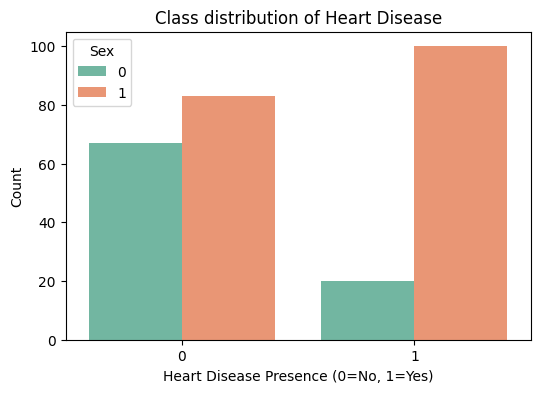

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Disease', hue='Sex', data=df_cleaned, palette='Set2')
plt.title('Class distribution of Heart Disease')
plt.xlabel('Heart Disease Presence (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

Print dimensions of dataframe

In [10]:
print(f"Dataset shape: {df_cleaned.shape[0]} rows, {df_cleaned.shape[1]} columns")

Dataset shape: 270 rows, 14 columns


Split data into train (70%) and test sets

In [11]:
p_train = 0.70 # Training percentage

df_cleaned['is_train'] = np.random.uniform(0, 1, len(df_cleaned)) <= p_train
train, test = df_cleaned[df_cleaned['is_train']==True], df_cleaned[df_cleaned['is_train']==False]

Remove temporary split column

In [12]:
df_cleaned.drop(['is_train'], axis=1, inplace=True)

print(f"Training samples: {len(train)}")
print(f"Test samples:    {len(test)}")

Training samples: 179
Test samples:    91


Correlation heatmap of dataset features

<Axes: >

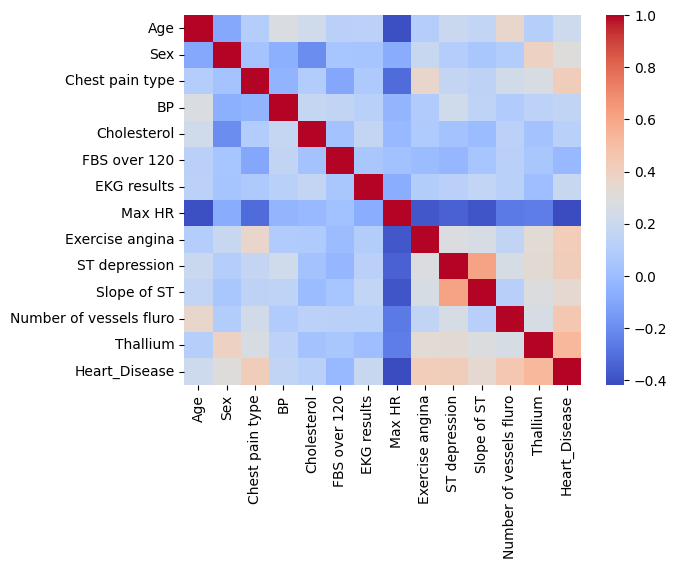

In [13]:
corr = df_cleaned.corr()
sns.heatmap(corr, cmap='coolwarm')


Select key features for classification model

In [14]:
features = [
    "Chest pain type",
    "Max HR",
    "Exercise angina",
    "ST depression",
    "Slope of ST",
    "Number of vessels fluro",
    "Thallium"
]

X = df_cleaned[features]
y = df_cleaned["Heart_Disease"]